In [2]:
import requests
import json
import numpy as np
import matplotlib.pyplot as plt

#import chart_studio.plotly as py #For World Map
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot
from IPython.core.display import display, HTML
init_notebook_mode(connected=True)

/var/folders/_v/q6j8tl0d2cb93y5h0_d24pgr0000gn/T/ipykernel_5863/2572160481.py:9: DeprecationWarning:

Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display



## Geographical API Example

Interact with one geographical API: OpenStreetMap is a free open-source geographical database of the world (the entire dataset is around 800 GB). Several APIs allow to exploit this enormuos quantity of data.

In this exercise, we implement the **Overpass API**, that allows us to query specific data from the OSM data set. In this case, we do not use a **wrapper** (e.g.: an already implemented interface to the API), but we access the endpoint using the _requests_ Python library.

Definition of endpoint and query

In [3]:
overpass_url = "http://overpass-api.de/api/interpreter"

In [4]:
# query to extract all the Biergarten in Germany
# test it at http://overpass-turbo.eu/
# https://nominatim.openstreetmap.org/
overpass_query = """
[out:json];
area["ISO3166-1"="DE"][admin_level=2];
(node["amenity"="biergarten"](area);
 way["amenity"="biergarten"](area);
 rel["amenity"="biergarten"](area);
);
out center;
"""

In [5]:
response = requests.get(overpass_url, params={'data': overpass_query})

In [6]:
data = response.json()

Inspect the retrieved data

In [7]:
data['elements'][:5]

[{'type': 'node',
  'id': 25338407,
  'lat': 49.9534891,
  'lon': 10.8750469,
  'tags': {'amenity': 'biergarten', 'noname': 'yes'}},
 {'type': 'node',
  'id': 26865440,
  'lat': 52.4333644,
  'lon': 13.190734,
  'tags': {'amenity': 'biergarten',
   'name': 'Spinnerbrücke',
   'note': 'Motorradtreff',
   'toilets:wheelchair': 'no',
   'website': 'https://spinner-bruecke.de/',
   'wheelchair': 'yes'}},
 {'type': 'node',
  'id': 27159163,
  'lat': 48.9694336,
  'lon': 8.3902958,
  'tags': {'amenity': 'biergarten'}},
 {'type': 'node',
  'id': 27318009,
  'lat': 52.4200885,
  'lon': 13.1763456,
  'tags': {'addr:city': 'Berlin',
   'addr:housenumber': '260',
   'addr:postcode': '14109',
   'addr:street': 'Kronprinzessinnenweg',
   'amenity': 'biergarten',
   'contact:email': 'info@loretta-berlin.de',
   'contact:fax': '+49 30 80105334',
   'contact:phone': '+49 30 80105333',
   'contact:website': 'https://www.loretta-berlin.de/lorettas-biergarten/',
   'name': 'Loretta',
   'opening_hours': 

Parse JSON response and plot the results

In [8]:
coords = []
for element in data['elements']:
    if element['type'] == 'node':
        lon = element['lon']
        lat = element['lat']
        coords.append((lon, lat))
    elif 'center' in element:
        lon = element['center']['lon']
        lat = element['center']['lat']
        coords.append((lon, lat))

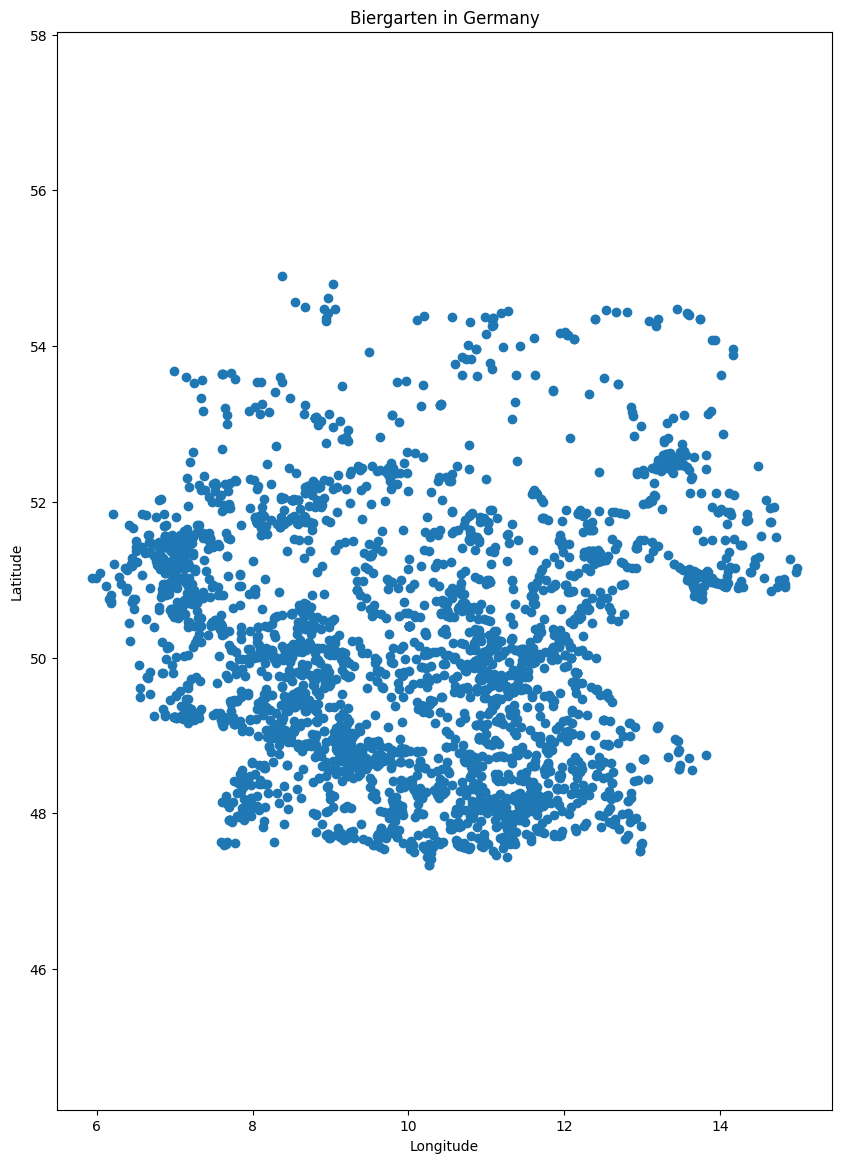

In [9]:
# convert coordinates into numpy array
X = np.array(coords)

plt.figure(figsize=(10, 14))
plt.title('Biergarten in Germany')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.axis('equal')

plt.plot(X[:, 0], X[:, 1], 'o')

display()

Use Plotly library to plot results over geographic map.

In [ ]:
trace = dict(type='scattergeo', 
                   lon=X[:, 0].tolist(),
                   lat=X[:, 1].tolist(),
                   marker = dict(size = 2))
lyt = dict(geo = dict(showcountries=True, projection = dict(scale=7), resolution=50, center=dict(lon=10,lat=50), scope='europe'))
fig = dict(data=[trace], layout=lyt)
p = plot(fig, output_type='div')

display(HTML(p))